# UKRN Open and Transparent Research Practices (OTRP) Survey Analysis Script

## About

Welcome to the UKRN OTRP Survey analysis notebook!

This notebook can be used to analyse various data collected through the first run of the OTRP survey between December 2022 and April 2023. To get the relevant data, please head to our Figshare repository and pull the dataset(s) you want to use: https://doi.org/10.48420/22094216.v1

We assume that you found this notebook in our GitHub repo and you are familiar with what this is all about and the necessary requirements to run this notebook written in Python! No? Please have a look at: https://github.com/LukasNoe/ukrn_otrp

Feel free to use our code for whatever reasons you like and you deem it useful for, unless it's illegal or discriminatory. Always respect the **GNU General Public License v3.0** this notebook and everything else related to it is released under.




In [248]:
#Import libraries necessary to run this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
#Read the relevant csv file
df = pd.read_csv('../data/otrp_export_2703.csv', low_memory = False)

#Inspect the csv
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])

#Print the first 5 rows of df
df.head()


DataFrame Shape : (2385, 276)

Number of rows : 2385

Number of columns : 276


,Progress,Duration (in seconds),Finished,Consent,Q1,Q2,Q1.surrey,Q1.surrey_5_TEXT,Q1.ox,Q1.1.ox,...,Q1.oxford_6,Q1.oxford_6_TEXT,Q2.oxford_1,Q3.oxford,Q3.oxford_4_TEXT,Q3.oxford_5_TEXT,Q4.oxford,Q5.oxford,Q6.oxford,Q7.oxford
0,Progress,Duration (in seconds),Finished,Welcome to the UKRN Survey on Open and Transpa...,Institutional affiliation,Duration of employment,Please tell us which Faculty you are currently...,Please tell us which Faculty you are currently...,Please select your primary affiliation at Oxford:,"You have selected ""other"" in the primary affil...",...,What additional support would you find useful ...,What additional support would you find useful ...,How aware are you of the standards of good pra...,If you had a query of a concern about research...,If you had a query of a concern about research...,If you had a query of a concern about research...,Are you aware of the Oxford Research Archive f...,How much do you use ORCID?,How much do you engage with the training offer...,How much do you engage with the training offer...
1,"{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""QID3""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8""}","{""ImportId"":""QID222""}","{""ImportId"":""QID222_5_TEXT""}","{""ImportId"":""QID256""}","{""ImportId"":""QID257_TEXT""}",...,"{""ImportId"":""QID259_6""}","{""ImportId"":""QID259_6_TEXT""}","{""ImportId"":""QID260_1""}","{""ImportId"":""QID261""}","{""ImportId"":""QID261_4_TEXT""}","{""ImportId"":""QID261_5_TEXT""}","{""ImportId"":""QID262""}","{""ImportId"":""QID263""}","{""ImportId"":""QID264""}","{""ImportId"":""QID265""}"
2,100,768,TRUE,Yes,University of Manchester,2 - 5 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,10,TRUE,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100,524,TRUE,Yes,Oxford Brookes University,2 - 5 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
#Filter institution (use naming convention: <institutional abbreviation_df> e.g. uom_df)
uom_df = df[df['Q1'].isin(['University of Manchester'])]

In [251]:
#Inspect the filtered dataframe
shape = uom_df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape)
print('\nNumber of columns :', shape)

#Print the first 5 rows of df
uom_df.head()


DataFrame Shape : (303, 276)

Number of rows : (303, 276)

Number of columns : (303, 276)


,Progress,Duration (in seconds),Finished,Consent,Q1,Q2,Q1.surrey,Q1.surrey_5_TEXT,Q1.ox,Q1.1.ox,...,Q1.oxford_6,Q1.oxford_6_TEXT,Q2.oxford_1,Q3.oxford,Q3.oxford_4_TEXT,Q3.oxford_5_TEXT,Q4.oxford,Q5.oxford,Q6.oxford,Q7.oxford
2,100,768,TRUE,Yes,University of Manchester,2 - 5 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100,1260,TRUE,Yes,University of Manchester,5 - 10 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,100,1207,TRUE,Yes,University of Manchester,over 10 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,100,1851,TRUE,Yes,University of Manchester,5 - 10 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,100,1338,TRUE,Yes,University of Manchester,over 10 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
#Drop for university-specific columns (Surrey, Oxford, and Keele submitted additonal question sets which have to be dropped accordingly)
uom_df = uom_df.drop(columns=['Q1.surrey', 'Q1.surrey_5_TEXT', 'Q1.ox', 'Q1.1.ox', 'Q5.ox', 'Q2.surrey', 'Q3_career_OA', 'Q3_career_data', 'Q3_career_code', 'Q3_career_prereg', 'Q3_career_preprint', 'Q3_career_monographs', 'Q3_career_licences', 'Q3_career_ORCID', 'Q3_career_educational',
                      'Q4_work_data', 'Q4_work_data_4_TEXT', 'Q5_data_funding', 'Q5_data_funding_8_TEXT', 'Q6_data_knowledge', 'Q6_data_knowledge_15_TEXT', 'Q7_data_barriers', 'Q7_data_barriers_17_TEXT', 'Q8_data_incentives', 'Q8_data_incentives_13_TEXT', 'Q9_training', 'Q9_training_4_TEXT', 'Q10_training from', 'Q10_training from_18_TEXT',
                      'Q11_pub_autonomy', 'Q12_pub_choice_1', 'Q12_pub_choice_2', 'Q12_pub_choice_3', 'Q12_pub_choice_4', 'Q12_pub_choice_5', 'Q12_pub_choice_6', 'Q12_pub_choice_7', 'Q12_pub_choice_8', 'Q12_pub_choice_8_TEXT', 'Q13_rm', 'Q14_or_policy', 'Q15_or_culture', 'Q16_one_thing', 'Q17_comments', 'Q1.keele_1', 'Q2.keele_1', 'Q3.keele',
                      'Q4.keele', 'Q1.oxford_1', 'Q1.oxford_2', 'Q1.oxford_3', 'Q1.oxford_4', 'Q1.oxford_5', 'Q1.oxford_6', 'Q1.oxford_6_TEXT', 'Q2.oxford_1', 'Q3.oxford', 'Q3.oxford_4_TEXT', 'Q3.oxford_5_TEXT', 'Q4.oxford', 'Q5.oxford', 'Q6.oxford', 'Q7.oxford'])

In [253]:
uom_df.head()

,Progress,Duration (in seconds),Finished,Consent,Q1,Q2,Q3,Q4,Q5,Q6,...,Q14.7_8_TEXT,Q14.8,Q14.9,Q14.10,Q14.11,Q14.12,Q14.13,Q15_1,Q16,Q16_11_TEXT
2,100,768,TRUE,Yes,University of Manchester,2 - 5 years,(CAH15) Social sciences,Post-doctoral Research Associate,"Phase 2: Early (e.g., Research Associate, firs...",Quantitative,...,NaN,Yes,Library services at my previous institution,I do not know,I do not know,NaN,NaN,6,Lack of time,NaN
8,100,1260,TRUE,Yes,University of Manchester,5 - 10 years,(CAH15) Social sciences,Research Fellow,"Phase 2: Early (e.g., Research Associate, firs...",Other:,...,NaN,No,NaN,Recognition and reward,Not very well,"There is a fund to support open access work, b...",no comment,6,Lack of time,NaN
11,100,1207,TRUE,Yes,University of Manchester,over 10 years,(CAH19) Language and area studies,Professor,"Phase 4: Established/Experienced (e.g., Profes...",Qualitative,...,NaN,No,NaN,Monitoring and compliance,Ok,NaN,NaN,4,Lack of positive incentives,NaN
16,100,1851,TRUE,Yes,University of Manchester,5 - 10 years,(CAH10)Engineering and technology,Reader,"Phase 3: Mid/Recognised (e.g., Senior Lecturer...",Mixed,...,NaN,No,NaN,Monitoring and compliance,Very well,Journal open access policies/costs,Typically use preprints in public repositories...,6,Lack of dedicated funding,NaN
52,100,1338,TRUE,Yes,University of Manchester,over 10 years,(CAH11) Computing,Professor,"Phase 4: Established/Experienced (e.g., Profes...",Mixed,...,NaN,No,NaN,Monitoring and compliance,Ok,OA fees can sometimes be an issue.,All my funders require OA publishing; we routi...,4,Other. Please explain:,The sheer cost of reproducing others' results ...


In [254]:
#Calculate number of responses
responses = (uom_df.shape[0])
print(responses)

303


In [255]:
#Print the number of complete responses
print(sum(uom_df['Progress'] == '100'))

67


## Q2: Duration of employment 

In [256]:
#Count all answers and list them descending
uom_df['Q2'].value_counts(sort=True)

under 2 years    108
2 - 5 years       89
over 10 years     62
5 - 10 years      44
Name: Q2, dtype: int64

In [257]:
#Normalise the count to represent answers in percent
uom_df['Q2'].value_counts(sort=True, normalize=True) * 100

under 2 years    35.643564
2 - 5 years      29.372937
over 10 years    20.462046
5 - 10 years     14.521452
Name: Q2, dtype: float64

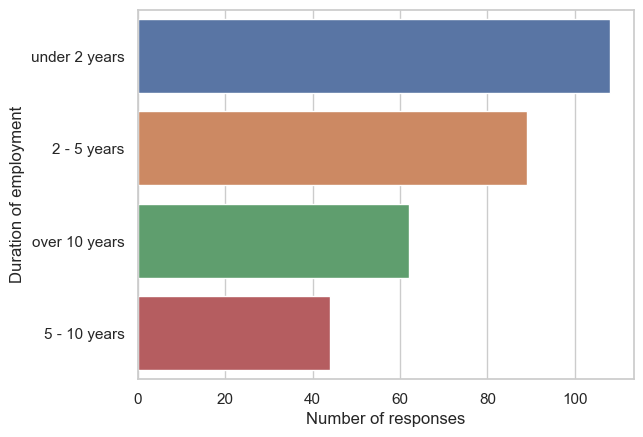

In [259]:
#Plot question two as a bar plot
sns.set_theme(style="whitegrid")

countplot = sns.countplot(data=uom_df, y="Q2", order = uom_df['Q2'].value_counts().index)
#countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, ha="right")
countplot.set(xlabel="Number of responses", ylabel="Duration of employment")

plt.show()
#plt.savefig('../maia_survey/images/using_AI.png', bbox_inches='tight', dpi = 300)

In [258]:
#Display how many particpants haven't given an answer
count = uom_df["Q2"].isna().sum()
print(count, "participants have not answered.")

0 participants have not answered.


## Q3: Research discipline

In [260]:
#Count all answers and list them descending
uom_df['Q3'].value_counts(sort=True)

(CAH10)Engineering and technology                                                     64
(CAH15) Social sciences                                                               35
(CAH03) Biological and sport sciences                                                 24
(CAH02) Subjects allied to medicine (e.g., nursing, pharmacology, health sciences)    23
(CAH04) Psychology                                                                    22
(CAH11) Computing                                                                     20
(CAH07) Physical sciences                                                             17
(CAH20) Historical, philosophical, and religious studies                              14
(CAH26) Geography, earth, and environmental studies                                   12
(CAH01) Medicine and dentistry                                                        12
(CAH22) Education and teaching                                                         9
(CAH19) Language and 

In [261]:
#Normalise the count to represent answers in percent
uom_df['Q3'].value_counts(sort=True, normalize=True) * 100

(CAH10)Engineering and technology                                                     22.614841
(CAH15) Social sciences                                                               12.367491
(CAH03) Biological and sport sciences                                                  8.480565
(CAH02) Subjects allied to medicine (e.g., nursing, pharmacology, health sciences)     8.127208
(CAH04) Psychology                                                                     7.773852
(CAH11) Computing                                                                      7.067138
(CAH07) Physical sciences                                                              6.007067
(CAH20) Historical, philosophical, and religious studies                               4.946996
(CAH26) Geography, earth, and environmental studies                                    4.240283
(CAH01) Medicine and dentistry                                                         4.240283
(CAH22) Education and teaching          

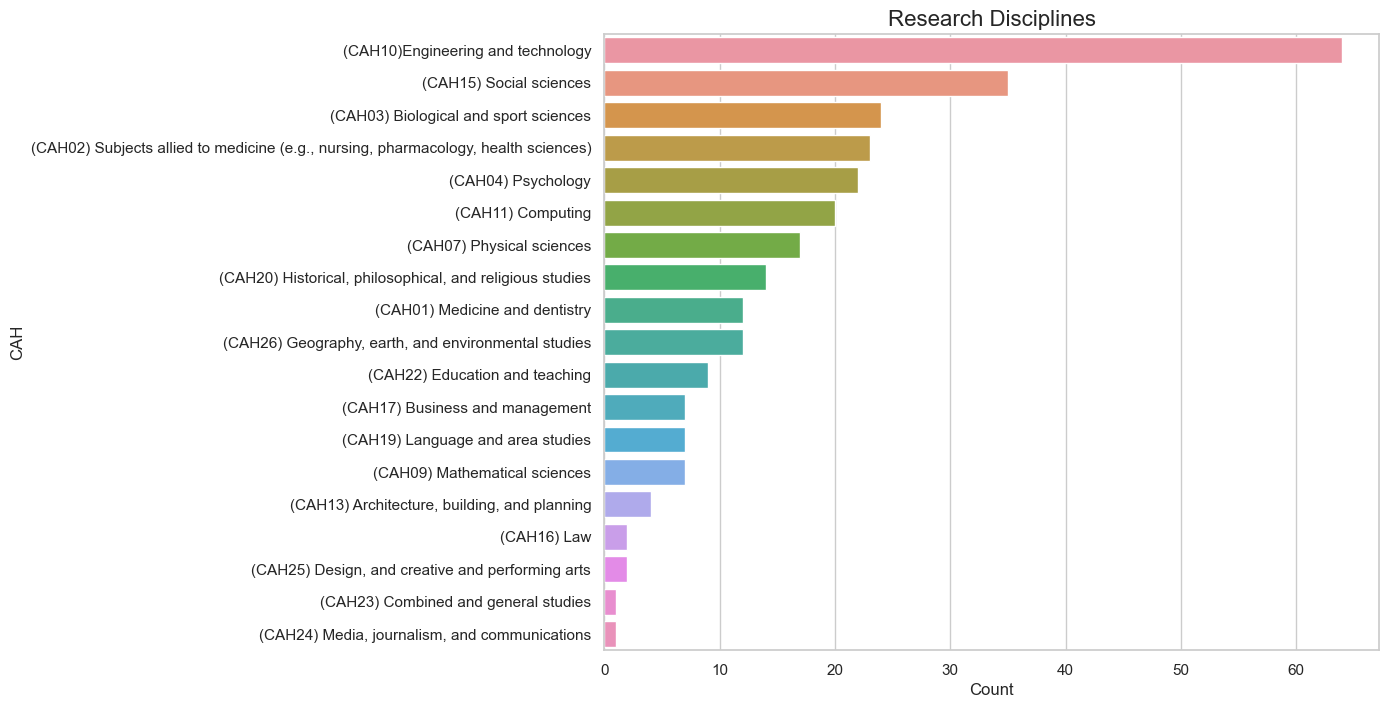

In [317]:
#Plot question three as a pie chart
# Group the data by a categorical column
# Group the data by the column
grouped_data = uom_df.groupby('Q3').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q3', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('CAH', fontsize=12)
plt.title('Research Disciplines', fontsize=16)

# Show the chart
plt.show()

In [281]:
#Display how many particpants haven't given an answer
count = uom_df["Q3"].isna().sum()
print(count, "participants have not answered.")

20 participants have not answered.


## Q4: Job role

In [282]:
#Count all answers and list them descending
uom_df['Q4'].value_counts(sort=True)

PhD student                      25
Professor                        19
Senior Lecturer                  15
Lecturer                         14
PhD candidate                    12
                                 ..
Professor of Latin                1
Professor of socioeconomics       1
PhD Student in Cancer Science     1
post graduate student             1
Msc                               1
Name: Q4, Length: 137, dtype: int64

In [283]:
#Normalise the count to represent answers in percent
uom_df['Q4'].value_counts(sort=True, normalize=True) * 100

PhD student                      8.960573
Professor                        6.810036
Senior Lecturer                  5.376344
Lecturer                         5.017921
PhD candidate                    4.301075
                                   ...   
Professor of Latin               0.358423
Professor of socioeconomics      0.358423
PhD Student in Cancer Science    0.358423
post graduate student            0.358423
Msc                              0.358423
Name: Q4, Length: 137, dtype: float64

In [284]:
#Display how many particpants haven't given an answer
count = uom_df["Q4"].isna().sum()
print(count, "participants have not answered.")

24 participants have not answered.


## Q5: Current career stage

In [285]:
#Count all answers and list them descending
uom_df['Q5'].value_counts(sort=True)

Phase 1: Junior (e.g., PhD candidate, Research Assistant)                              134
Phase 2: Early (e.g., Research Associate, first grant holder, Lecturer)                 67
Phase 4: Established/Experienced (e.g., Professor, Principal Fellows or Scientists)     47
Phase 3: Mid/Recognised (e.g., Senior Lecturer, Reader, Senior Researcher)              35
Name: Q5, dtype: int64

In [287]:
#Normalise the count to represent answers in percent
uom_df['Q5'].value_counts(sort=True, normalize=True) * 100

Phase 1: Junior (e.g., PhD candidate, Research Assistant)                              47.349823
Phase 2: Early (e.g., Research Associate, first grant holder, Lecturer)                23.674912
Phase 4: Established/Experienced (e.g., Professor, Principal Fellows or Scientists)    16.607774
Phase 3: Mid/Recognised (e.g., Senior Lecturer, Reader, Senior Researcher)             12.367491
Name: Q5, dtype: float64

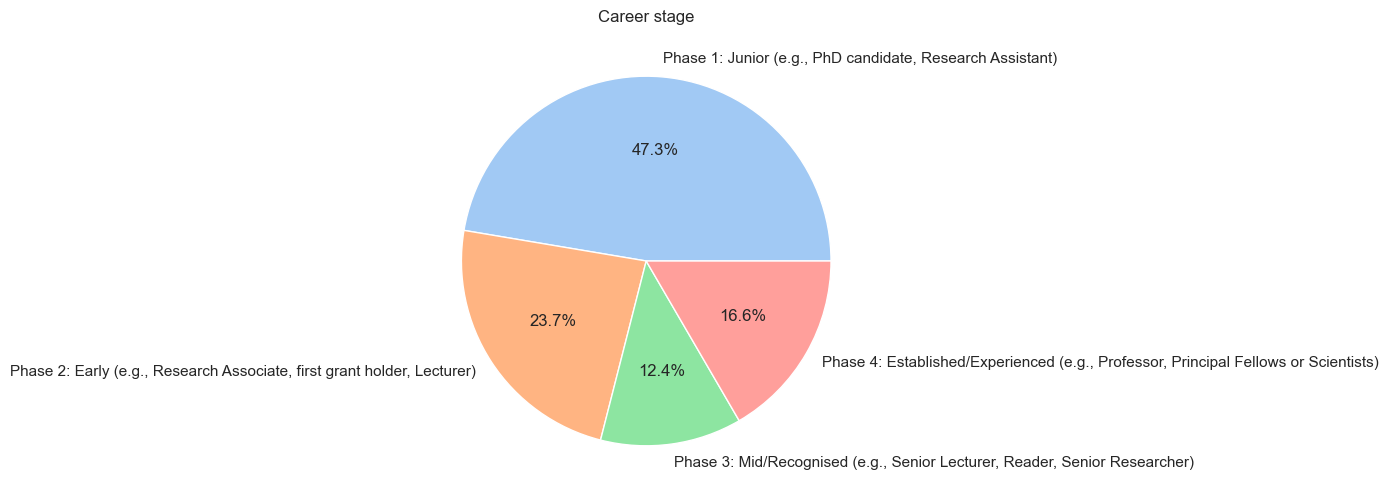

In [316]:
# Group the data by the column
grouped_data = uom_df.groupby('Q5').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q5'], autopct='%1.1f%%')

# Add a title
plt.title('Career stage')

# Show the chart
plt.show()

In [318]:
#Display how many particpants haven't given an answer
count = uom_df["Q5"].isna().sum()
print(count, "participants have not answered.")

20 participants have not answered.
